In [2]:
import pandas as pd
import numpy as np
import random

from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

import openml


In [33]:
def load_df():
    label_encoder = preprocessing.LabelEncoder()

    dataset_id = 1467
    df, *_ = openml.datasets.get_dataset(dataset_id, download_data=True, download_qualities=True, download_features_meta_data=True).get_data()
    df = df.dropna()
    # display(df)

    cat = df.select_dtypes(exclude=['number'])
    for col in cat.columns:
        df[col] = label_encoder.fit_transform(df[col])

    

    df = df.to_numpy()
    target = df[:, -1]
    target = [1 - x for x in target]
    data = df[:, 2:-1]

    dataset = {'target': target,
               'data': data,
               'info': 'https://www.openml.org/search?type=data&status=active&id=1467',
               'date_access': '2024-09-15'}

    return dataset

In [34]:
df = load_df()
# print(len(df['data']))

540


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
random_state = 42
# Definindo os modelos
modelos = {
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=1000000, random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'SVM': SVC(random_state=random_state),
    'Logistic Regression': LogisticRegression(max_iter=1000000, random_state=random_state),
    'XGBoost': xgb.XGBClassifier(random_state=random_state)
}

In [7]:
from scipy.stats import pearsonr, spearmanr

In [8]:
def calculate_correlations(data, target):
    pearson_correlations = {}
    spearman_correlations = {}
    
    for column in data.columns:
        feature_values = data[column].values
        target_values = target.values
        
        # Calcula o coeficiente de correlação de Pearson
        pearson_corr, _ = pearsonr(feature_values, target_values)
        pearson_correlations[column] = pearson_corr
        
        # Calcula o coeficiente de correlação de Spearman
        spearman_corr, _ = spearmanr(feature_values, target_values)
        spearman_correlations[column] = spearman_corr
    
    return pearson_correlations, spearman_correlations

In [9]:
def evaluate_models(data, target, n_iterations=1, test_size=0.2, random_state=42, new = 0):
    
    # Dicionário para armazenar as acurácias
    acuracias = {nome_modelo: [] for nome_modelo in modelos}
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=test_size, random_state=random_state)
    
    for _ in range(n_iterations):
        
        # Loop para treinar e avaliar cada modelo
        for nome_modelo, modelo in modelos.items():
            modelo.fit(X_train, y_train)
            val_predictions = modelo.predict(X_test)
            acuracia = accuracy_score(y_test, val_predictions)
            acuracias[nome_modelo].append(acuracia)
    
    # Calculando a média das acurácias
    medias_acuracias = {nome_modelo: np.mean(acuracias[nome_modelo]) for nome_modelo in acuracias}
    
    if new == 0:    
        sns.set(style="whitegrid")
        model_names = list(medias_acuracias.keys())
        accuracies = list(medias_acuracias.values())
        
        plt.figure(figsize=(10, 6))
        colors = sns.color_palette('pastel', len(model_names))
        bars = plt.bar(model_names, accuracies, color=colors)
        
        for bar, accuracy in zip(bars, accuracies):
            height = bar.get_height()
            plt.annotate(f'{accuracy:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        
        plt.xlabel('Modelo')
        plt.ylabel('Acurácia Média')
        plt.title('Acurácia Média de Validação dos Modelos após 1000 Iterações')
        plt.ylim(0, 1)
        
        plt.show()
    
    return medias_acuracias
    

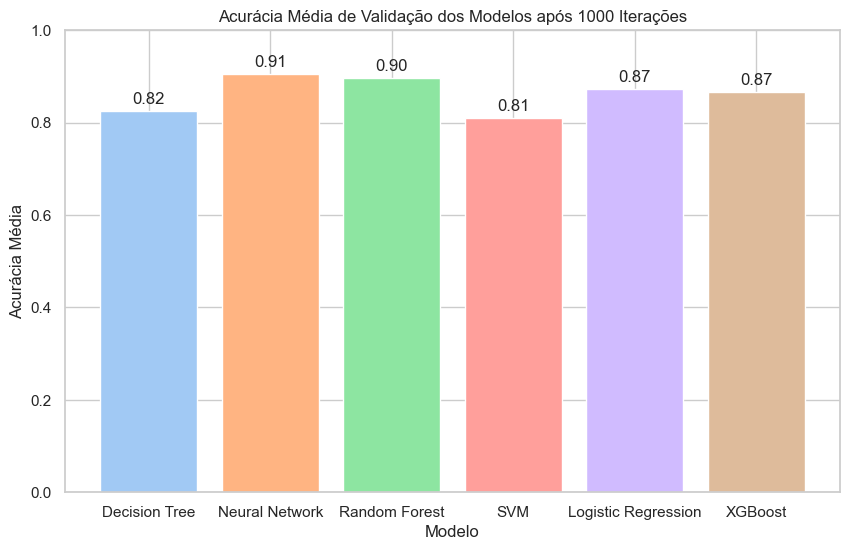

{'Decision Tree': 0.8246445497630331,
 'Neural Network': 0.9052132701421801,
 'Random Forest': 0.8957345971563981,
 'SVM': 0.8104265402843602,
 'Logistic Regression': 0.8720379146919431,
 'XGBoost': 0.8672985781990521}

In [10]:
evaluate_models(df['data'], df['target'])

In [11]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

def calculate_correlations(data, target):
    pearson_correlations = {}
    spearman_correlations = {}
    
    # Converte o array numpy de dados para um DataFrame pandas temporariamente
    data_df = pd.DataFrame(data)
    
    for column in data_df.columns:
        feature_values = data_df[column].values
        target_values = target
        
        # Calcula o coeficiente de correlação de Pearson
        pearson_corr, _ = pearsonr(feature_values, target_values)
        pearson_correlations[column] = pearson_corr
        
        # Calcula o coeficiente de correlação de Spearman
        spearman_corr, _ = spearmanr(feature_values, target_values)
        spearman_correlations[column] = spearman_corr
    
    return pearson_correlations, spearman_correlations

# Carrega o DataFrame
dataset = load_df()
data = dataset['data']
target = dataset['target']

# Calcula as correlações
pearson_corr, spearman_corr = calculate_correlations(data, target)

print("Pearson Correlations:", pearson_corr)
print("Spearman Correlations:", spearman_corr)

Pearson Correlations: {0: -0.39613802038863044, 1: -0.00190006215349027, 2: -0.2991070946323058, 3: -0.1032902577472181, 4: -0.2346180645932078, 5: -0.1704496882350281, 6: -0.33726783643584457, 7: -0.20160332101073214, 8: -0.056141620357697174, 9: 0.17718332783431173, 10: -0.24232535243696945, 11: -0.11242517670222649, 12: -0.3437788679905216, 13: 0.27532065795327976, 14: -0.3433766903020893, 15: -0.0028789053499777193, 16: -0.09151976380438967, 17: 0.13155536071341722, 18: -0.059831142472136514, 19: -0.15363950619886135, 20: -0.09623881414869444, 21: -0.3722539038216167, 22: -0.11661292083388686, 23: -0.1145540185417912, 24: -0.2521031608730254, 25: -0.0918203926750991, 26: -0.38995070812046073, 27: -0.025021552152976897, 28: -0.09289325911269894, 29: 0.05363630689990418, 30: 0.17357159555969262, 31: -0.10659011742006927, 32: -0.318546590563256, 33: -0.26887498662116244, 34: -0.027387002835711813, 35: -0.2896189745531692, 36: 0.11489569470456916, 37: -0.2617505401229514, 38: -0.366793

In [12]:
def top3_calculate_correlations(data, target):
    pearson_correlations = {}
    spearman_correlations = {}
    
    # Converte o array numpy de dados para um DataFrame pandas temporariamente
    data_df = pd.DataFrame(data)
    
    for column in data_df.columns:
        feature_values = data_df[column].values
        target_values = target
        
        # Calcula o coeficiente de correlação de Pearson
        pearson_corr, _ = pearsonr(feature_values, target_values)
        pearson_correlations[column] = pearson_corr
        
        # Calcula o coeficiente de correlação de Spearman
        spearman_corr, _ = spearmanr(feature_values, target_values)
        spearman_correlations[column] = spearman_corr
    
    # Seleciona os 3 melhores resultados de Pearson
    # top_3_pearson = sorted(pearson_correlations.items(), key=lambda item: abs(item[1]), reverse=True)[:10]
    top_3_pearson = sorted(pearson_correlations.items(), key=lambda item: abs(item[1]))[:3]
    # Seleciona os 3 melhores resultados de Spearman
    # top_3_spearman = sorted(spearman_correlations.items(), key=lambda item: abs(item[1]), reverse=True)[:10]
    top_3_spearman = sorted(spearman_correlations.items(), key=lambda item: abs(item[1]))[:3]
    return top_3_pearson, top_3_spearman

# Carrega o DataFrame
dataset = load_df()
data = dataset['data']
target = dataset['target']

# Calcula as correlações e obtém os 3 melhores resultados

top_3_pearson, top_3_spearman = top3_calculate_correlations(data, target)

print("Top 3 Pearson Correlations:", top_3_pearson)
print("Top 3 Spearman Correlations:", top_3_spearman)

Top 3 Pearson Correlations: [(1, -0.00190006215349027), (15, -0.0028789053499777193), (27, -0.025021552152976897)]
Top 3 Spearman Correlations: [(27, -0.0038689151519619184), (34, -0.01786276330551028), (16, -0.04366851930205833)]


In [13]:
def remove_top_correlated_features(data, top_features):
    # Converte o array numpy de dados para um DataFrame pandas temporariamente
    data_df = pd.DataFrame(data)
    
    # Obtém os nomes das colunas a serem removidas
    columns_to_remove = [feature[0] for feature in top_features]
    
    # Remove as colunas pelos nomes
    data_df.drop(columns=columns_to_remove, inplace=True)
    
    # Converte de volta para um array numpy
    updated_data = data_df.to_numpy()
    
    return updated_data

top_features = top_3_pearson + top_3_spearman

# Remove os atributos correlacionados do DataFrame
updated_data = remove_top_correlated_features(data, top_features)

print("Original Data Shape:", data.shape)
print("Updated Data Shape:", updated_data.shape)

Original Data Shape: (1055, 41)
Updated Data Shape: (1055, 36)


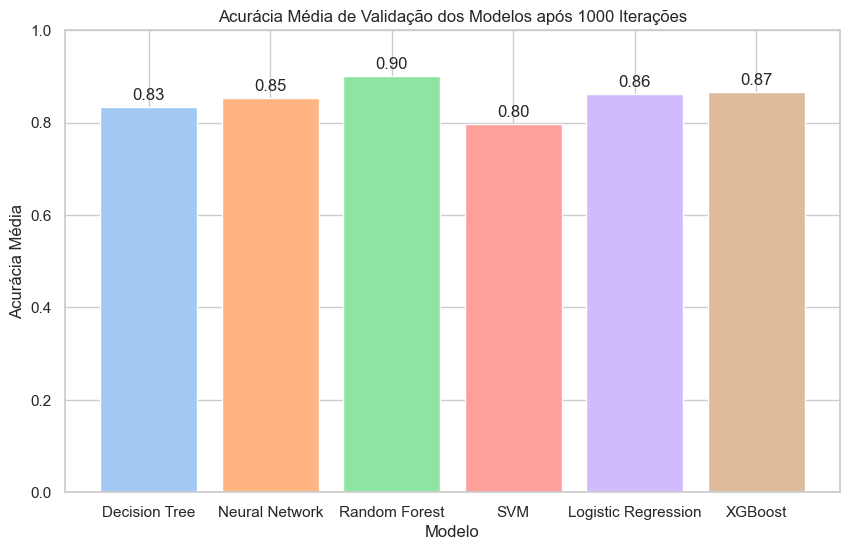

{'Decision Tree': 0.8341232227488151,
 'Neural Network': 0.8530805687203792,
 'Random Forest': 0.9004739336492891,
 'SVM': 0.7962085308056872,
 'Logistic Regression': 0.8625592417061612,
 'XGBoost': 0.8672985781990521}

In [14]:
evaluate_models(updated_data, df['target'])